In [1]:
from yaml import load, Loader
import pandas as pd
import util.analysis_utils as nls
from scipy import stats
from util.classes import SEEDS

%load_ext autoreload
%autoreload 2

In [2]:
og_df = pd.read_csv('/vol/aimspace/projects/ukbb/data/tabular/ukb668815_imaging.csv')
patients_df = nls.prep_patients_df(og_df)

/tmp/ipykernel_3156854/3026087908.py:1: DtypeWarning: Columns (20,68,1186,1187,1188,1258,1259,1260,1552,2745,2746,2747,2748,2749,2750,2751,2752,2753,2754,2755,2756,2757,2758,2759,2760,2761,2762,2763,2764,2765,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783,2784,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794,2795,2796,2797,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,2867,2868,2869,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879,2880,2881,2882,2883,2884,2885,2886,2887,2888,2889,2890,2891,2892,2893,2894,2895,2896,2897,2898,2899,2900,2901,2902,2903,2904,2905,2906,2907,2908,2909,2910,2911,2912,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,3010,3011,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025,3084,3085,3086,3087,3088,3089,3090,3091,3092,3093,3094,3095,3096,3097,3098,3099,3

# Supervised UNet

In [3]:
cfg = load(open(f'configs/ukbb/test/exp4/ethn.yaml', 'r'), Loader=Loader)
unet_ethn_df = pd.DataFrame()
dataset = 'ukbb'
method = 'supervised'
seg_model = 'unet'
control = 'ethn'

task = 'seg_only_mid_slices'
for exp in [4]:
    for seed in SEEDS:
        res_df = pd.read_csv(f'outputs/results/csv/{dataset}/{method}/{seg_model}/exp{exp}/seed{seed}/{task}/{control}.csv')
        test_ethn_merged_df = nls.merge_results_patients(res_df, patients_df)
        nls_df = nls.get_all_results(test_ethn_merged_df, cfg)
        unet_ethn_df = pd.concat([unet_ethn_df, nls_df], ignore_index=True)

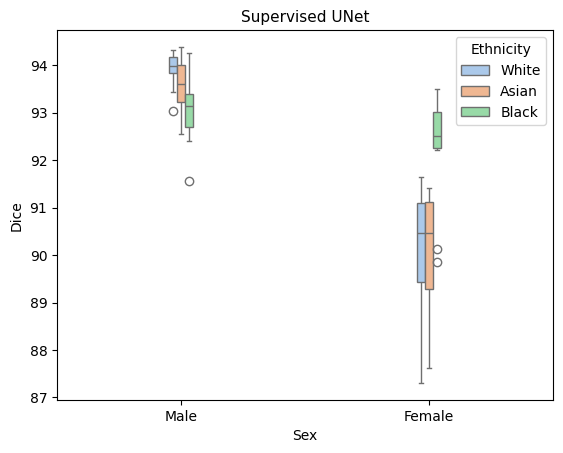

In [44]:
nls.plot_sex_dice_intersectional(unet_ethn_df, exp=4, title='Supervised UNet')

In [40]:
unet_ttest_df = nls.all_groups_ttest(unet_ethn_df, exp=4, task='seg only')
unet_ttest_df

,exp,task,group1,group2,t-statistic,p-value,significance
0,4,seg only,white_male,white_female,8.447474,1.119336e-07,True
1,4,seg only,asian_male,asian_female,7.629433,4.783237e-07,True
2,4,seg only,black_male,black_female,1.824634,8.470011e-02,False
3,4,seg only,white,asian,1.331689,1.995814e-01,False
4,4,seg only,white,black,1.231792,2.338772e-01,False
5,4,seg only,asian,black,-0.277885,7.842674e-01,False
6,4,seg only,male,female,6.443151,4.606366e-06,True


# Supervised UNet Multi Modal

In [46]:
unet_mm_ethn_df = pd.DataFrame()
dataset = 'ukbb'
method = 'supervised'
seg_model = 'unet'
control = 'ethn'

task = 'multi_modal'
for exp in [4]:
    for seed in SEEDS:
        res_df = pd.read_csv(f'outputs/results/csv/{dataset}/{method}/{seg_model}/exp{exp}/seed{seed}/{task}/{control}.csv')
        test_ethn_merged_df = nls.merge_results_patients(res_df, patients_df)
        nls_df = nls.get_all_results(test_ethn_merged_df, cfg)
        unet_mm_ethn_df = pd.concat([unet_mm_ethn_df, nls_df], ignore_index=True)

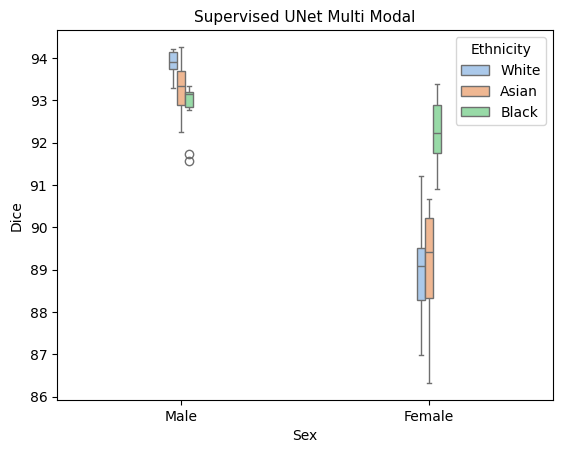

In [47]:
nls.plot_sex_dice_intersectional(unet_mm_ethn_df, exp=4, title='Supervised UNet Multi Modal')

In [48]:
unet_mm_ttest_df = nls.all_groups_ttest(unet_mm_ethn_df, exp=4, task='multi modal')
unet_mm_ttest_df

,exp,task,group1,group2,t-statistic,p-value,significance
0,4,multi modal,white_male,white_female,12.772530,1.836588e-10,True
1,4,multi modal,asian_male,asian_female,8.485417,1.048611e-07,True
2,4,multi modal,black_male,black_female,1.860562,7.922399e-02,False
3,4,multi modal,white,asian,1.401005,1.782175e-01,False
4,4,multi modal,white,black,-0.245429,8.089005e-01,False
5,4,multi modal,asian,black,-1.430040,1.698348e-01,False
6,4,multi modal,male,female,9.377451,2.379055e-08,True


# Supervised UNet Multi Task

In [50]:
unet_mt_ethn_df = pd.DataFrame()
task = 'multi_task'
for exp in [4]:
    for seed in SEEDS:
        res_df = pd.read_csv(f'outputs/results/csv/{dataset}/{method}/{seg_model}/exp{exp}/seed{seed}/{task}/{control}.csv')
        test_ethn_merged_df = nls.merge_results_patients(res_df, patients_df)
        nls_df = nls.get_all_results(test_ethn_merged_df, cfg)
        unet_mt_ethn_df = pd.concat([unet_mt_ethn_df, nls_df], ignore_index=True)

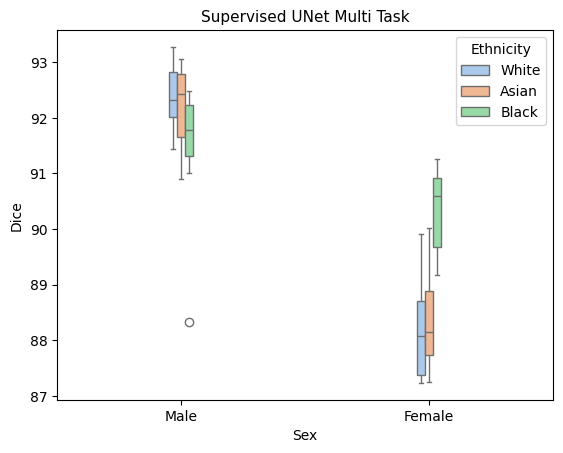

In [51]:
nls.plot_sex_dice_intersectional(unet_mt_ethn_df, exp=4, title='Supervised UNet Multi Task')

In [53]:
unet_mt_ttest_df = nls.all_groups_ttest(unet_mt_ethn_df, exp=4, task='multi task')
unet_mt_ttest_df

,exp,task,group1,group2,t-statistic,p-value,significance
0,4,multi task,white_male,white_female,11.224493,1.467915e-09,True
1,4,multi task,asian_male,asian_female,10.903453,2.322185e-09,True
2,4,multi task,black_male,black_female,2.505528,2.205306e-02,True
3,4,multi task,white,asian,2.319362,3.233404e-02,True
4,4,multi task,white,black,1.275404,2.183820e-01,False
5,4,multi task,asian,black,-1.118810,2.779302e-01,False
6,4,multi task,male,female,8.792872,6.220306e-08,True


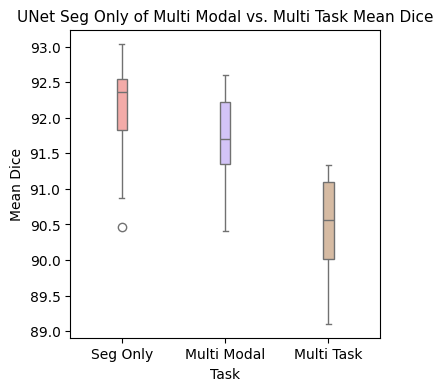

In [54]:
nls.boxplot_tasks(unet_ethn_df, unet_mm_ethn_df, unet_mt_ethn_df)